In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_squared_log_error, r2_score

In [2]:
data = pd.read_csv("Downloads/BBNI.JK.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,4400.0,4400.0,4400.0,4400.0,3436.901367,0
1,2019-01-02,4400.0,4400.0,4337.5,4362.5,3407.609375,15681200
2,2019-01-03,4337.5,4387.5,4325.0,4362.5,3407.609375,21416600
3,2019-01-04,4362.5,4400.0,4337.5,4362.5,3407.609375,41078600
4,2019-01-07,4412.5,4462.5,4412.5,4437.5,3466.192871,48108200


## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1241 non-null   object 
 1   Open       1241 non-null   float64
 2   High       1241 non-null   float64
 3   Low        1241 non-null   float64
 4   Close      1241 non-null   float64
 5   Adj Close  1241 non-null   float64
 6   Volume     1241 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.0+ KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03
mean,3766.676068,3809.437953,3718.049960,3762.947220,3355.122107,6.706130e+07
std,912.747807,914.221813,912.537524,914.206806,935.536638,5.222758e+07
min,1580.000000,1705.000000,1485.000000,1580.000000,1375.536499,0.000000e+00
25%,3000.000000,3050.000000,2962.500000,3000.000000,2611.778320,3.538360e+07
50%,3900.000000,3950.000000,3862.500000,3900.000000,3313.780518,5.141560e+07
75%,4512.500000,4562.500000,4487.500000,4512.500000,4082.027100,8.171140e+07
max,5675.000000,5750.000000,5600.000000,5650.000000,5650.000000,4.440854e+08


<Axes: ylabel='Frequency'>

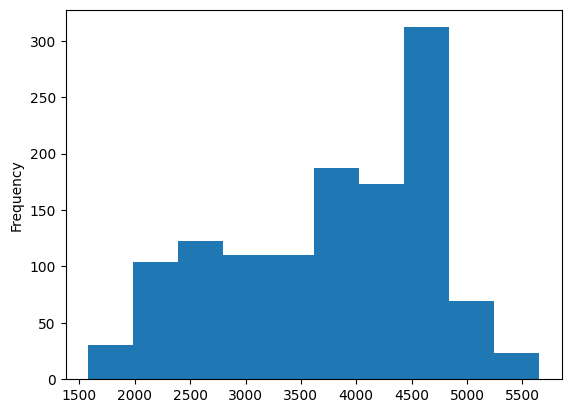

In [5]:
data.Close.plot.hist()

In [6]:
# Sort the dataset in date order (ascending)
data.sort_values(by=["Date"], inplace=True, ascending=True)

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,4400.0,4400.0,4400.0,4400.0,3436.901367,0
1,2019-01-02,4400.0,4400.0,4337.5,4362.5,3407.609375,15681200
2,2019-01-03,4337.5,4387.5,4325.0,4362.5,3407.609375,21416600
3,2019-01-04,4362.5,4400.0,4337.5,4362.5,3407.609375,41078600
4,2019-01-07,4412.5,4462.5,4412.5,4437.5,3466.192871,48108200


In [8]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
data["Date"] = pd.to_datetime(data["Date"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1241 non-null   datetime64[ns]
 1   Open       1241 non-null   float64       
 2   High       1241 non-null   float64       
 3   Low        1241 non-null   float64       
 4   Close      1241 non-null   float64       
 5   Adj Close  1241 non-null   float64       
 6   Volume     1241 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.0 KB


In [11]:
data["Date"].head()

0   2019-01-01
1   2019-01-02
2   2019-01-03
3   2019-01-04
4   2019-01-07
Name: Date, dtype: datetime64[ns]

## Feature Engineering

In [12]:
data["Sale Year"] = data.Date.dt.year
data["Sale Month"] = data.Date.dt.month

In [13]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Sale Year,Sale Month
0,2019-01-01,4400.0,4400.0,4400.0,4400.0,3436.901367,0,2019,1
1,2019-01-02,4400.0,4400.0,4337.5,4362.5,3407.609375,15681200,2019,1
2,2019-01-03,4337.5,4387.5,4325.0,4362.5,3407.609375,21416600,2019,1
3,2019-01-04,4362.5,4400.0,4337.5,4362.5,3407.609375,41078600,2019,1
4,2019-01-07,4412.5,4462.5,4412.5,4437.5,3466.192871,48108200,2019,1


In [14]:
len(data)

1241

In [15]:
data["Sale Date"] = data.Date.dt.day

In [16]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Sale Year,Sale Month,Sale Date
0,2019-01-01,4400.0,4400.0,4400.0,4400.0,3436.901367,0,2019,1,1
1,2019-01-02,4400.0,4400.0,4337.5,4362.5,3407.609375,15681200,2019,1,2
2,2019-01-03,4337.5,4387.5,4325.0,4362.5,3407.609375,21416600,2019,1,3
3,2019-01-04,4362.5,4400.0,4337.5,4362.5,3407.609375,41078600,2019,1,4
4,2019-01-07,4412.5,4462.5,4412.5,4437.5,3466.192871,48108200,2019,1,7


In [17]:
data.drop(["Date"], inplace=True, axis=1)

In [18]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Sale Year,Sale Month,Sale Date
0,4400.0,4400.0,4400.0,4400.0,3436.901367,0,2019,1,1
1,4400.0,4400.0,4337.5,4362.5,3407.609375,15681200,2019,1,2
2,4337.5,4387.5,4325.0,4362.5,3407.609375,21416600,2019,1,3
3,4362.5,4400.0,4337.5,4362.5,3407.609375,41078600,2019,1,4
4,4412.5,4462.5,4412.5,4437.5,3466.192871,48108200,2019,1,7


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1241 non-null   float64
 1   High        1241 non-null   float64
 2   Low         1241 non-null   float64
 3   Close       1241 non-null   float64
 4   Adj Close   1241 non-null   float64
 5   Volume      1241 non-null   int64  
 6   Sale Year   1241 non-null   int32  
 7   Sale Month  1241 non-null   int32  
 8   Sale Date   1241 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 72.8 KB


## Analysis using matplotlib and seaborn

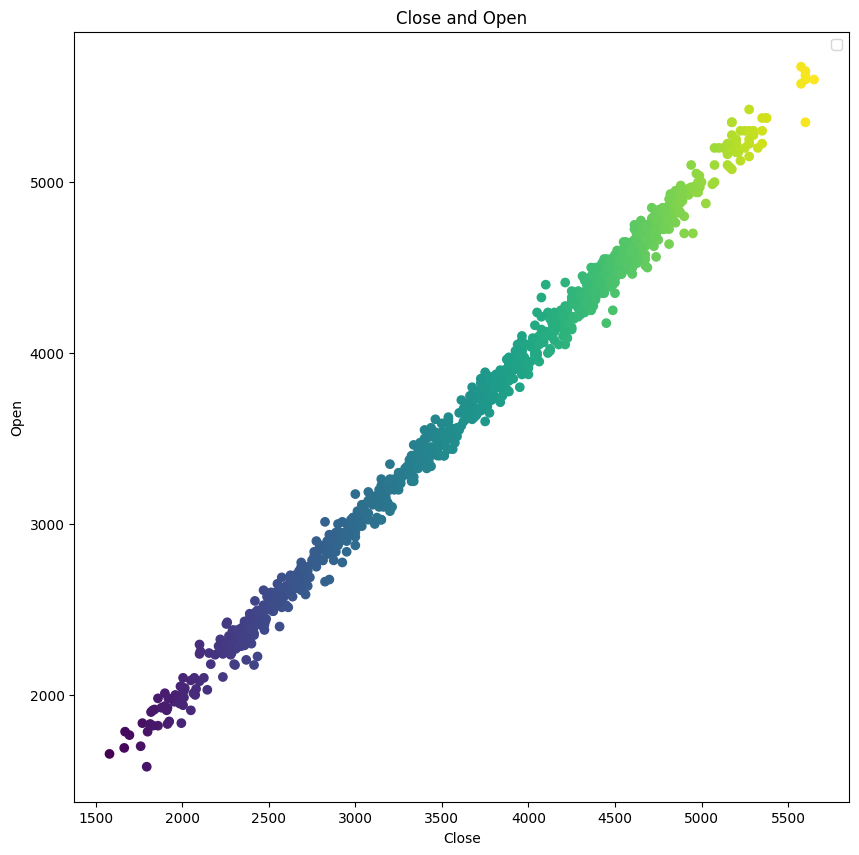

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Close and Open",
       xlabel="Close",
       ylabel="Open")
ax.legend("Target")
ax.scatter(data["Close"], data["Open"], c=data["Close"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<BarContainer object of 1241 artists>

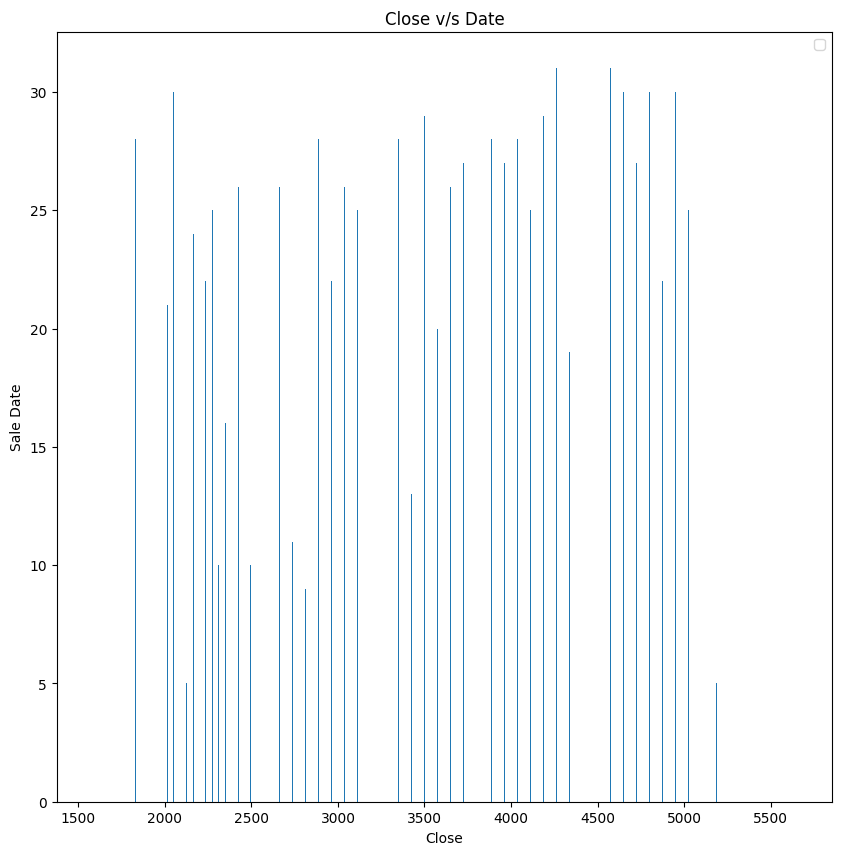

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Close v/s Date",
       xlabel="Close",
       ylabel="Sale Date")
ax.legend()
ax.bar(data["Close"], data["Sale Date"])
#fig.savefig("Documents/Git/ML-Crate/Stock Prediction Bank Negara/Images/closevsdate.png")

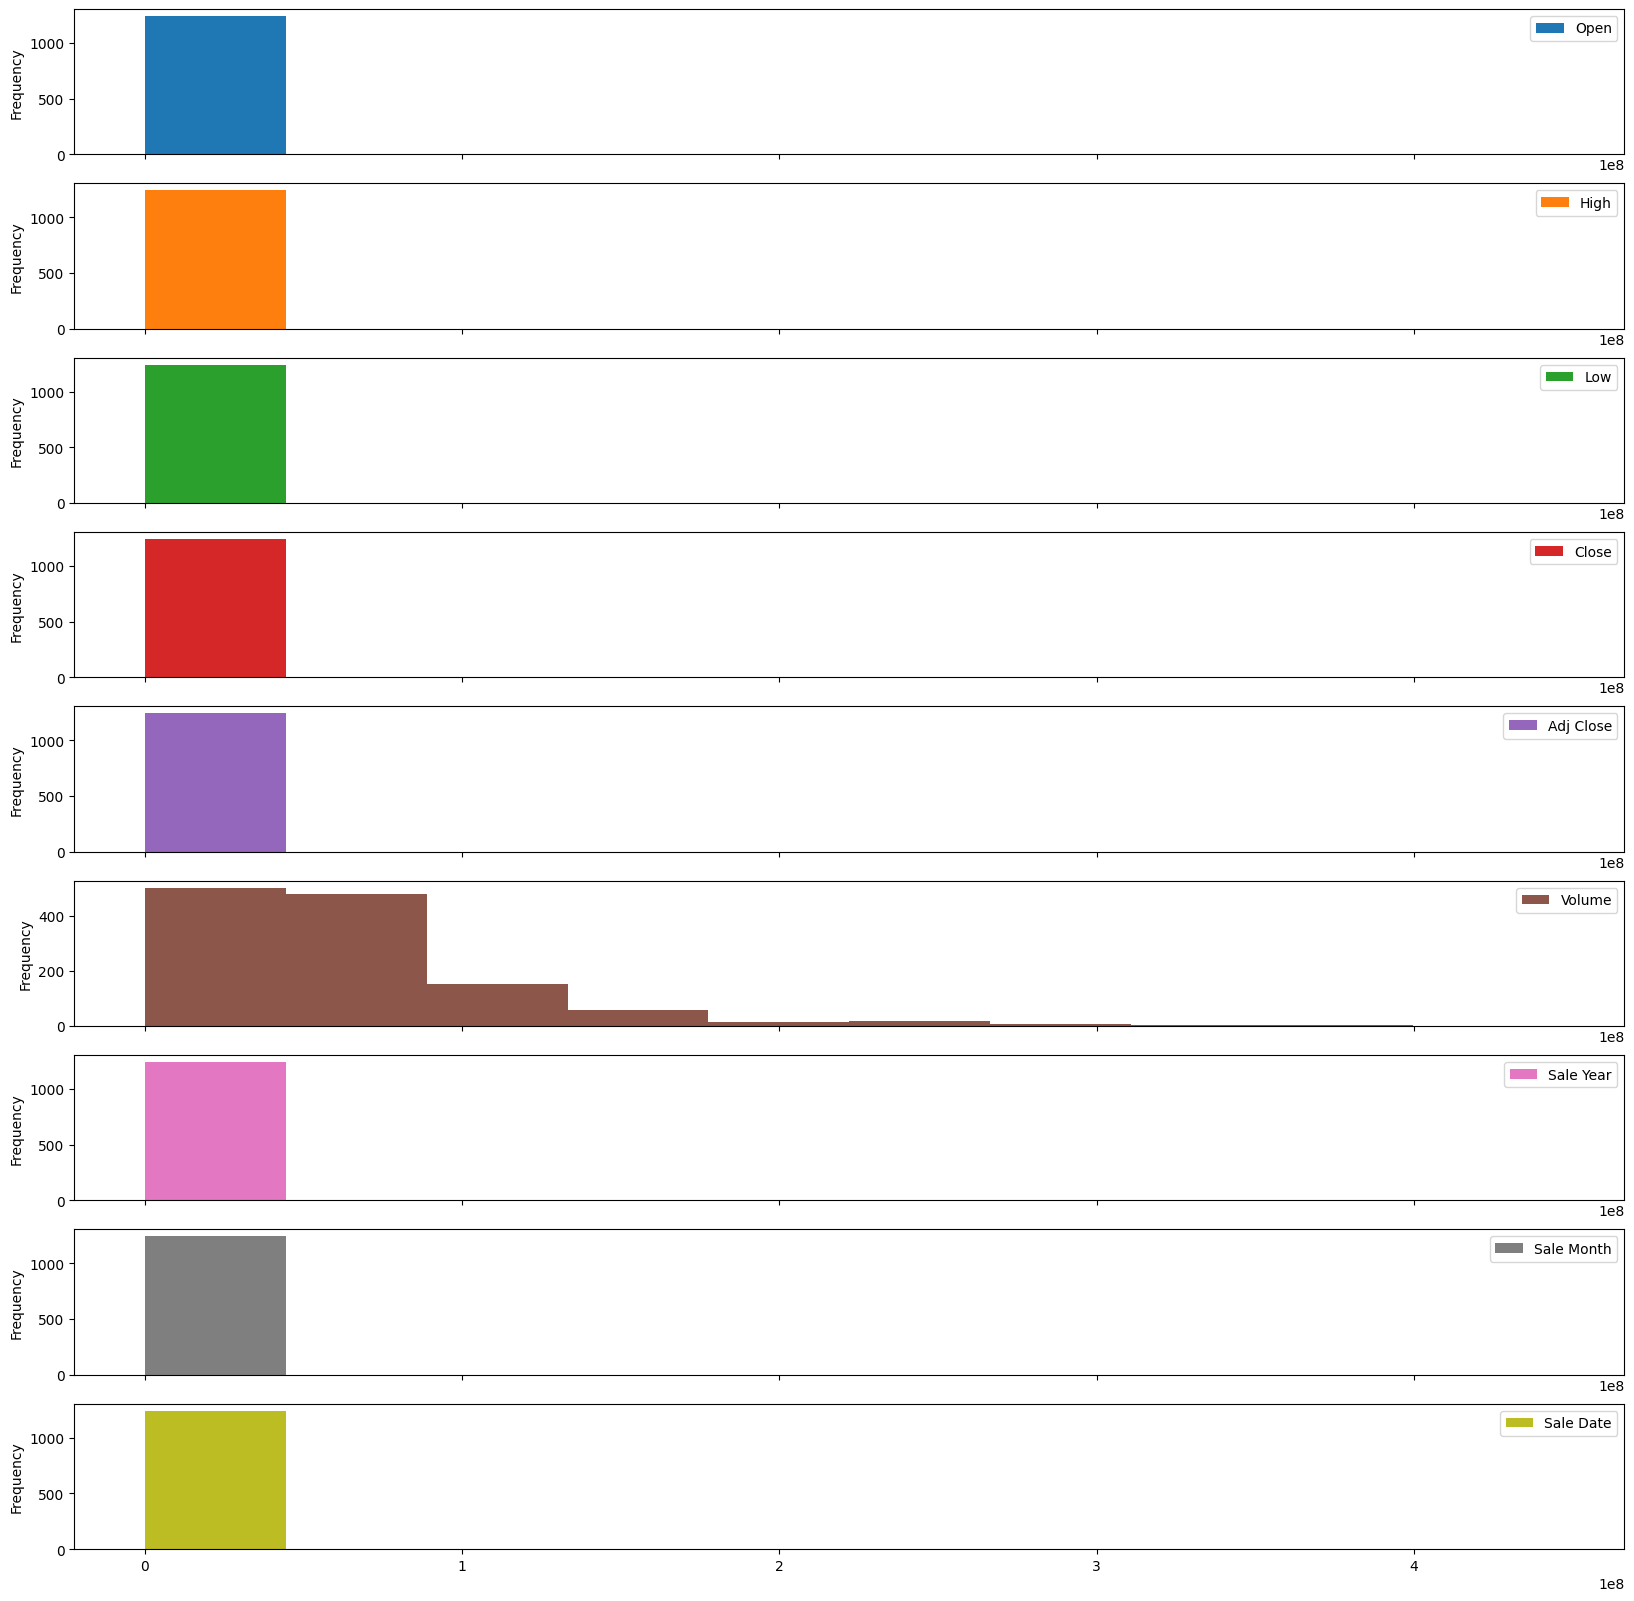

In [89]:
data.plot.hist(figsize=(20, 20), subplots=True);
fig.savefig("Documents/Git/ML-Crate/Stock Prediction Bank Negara/Images/stock.png")

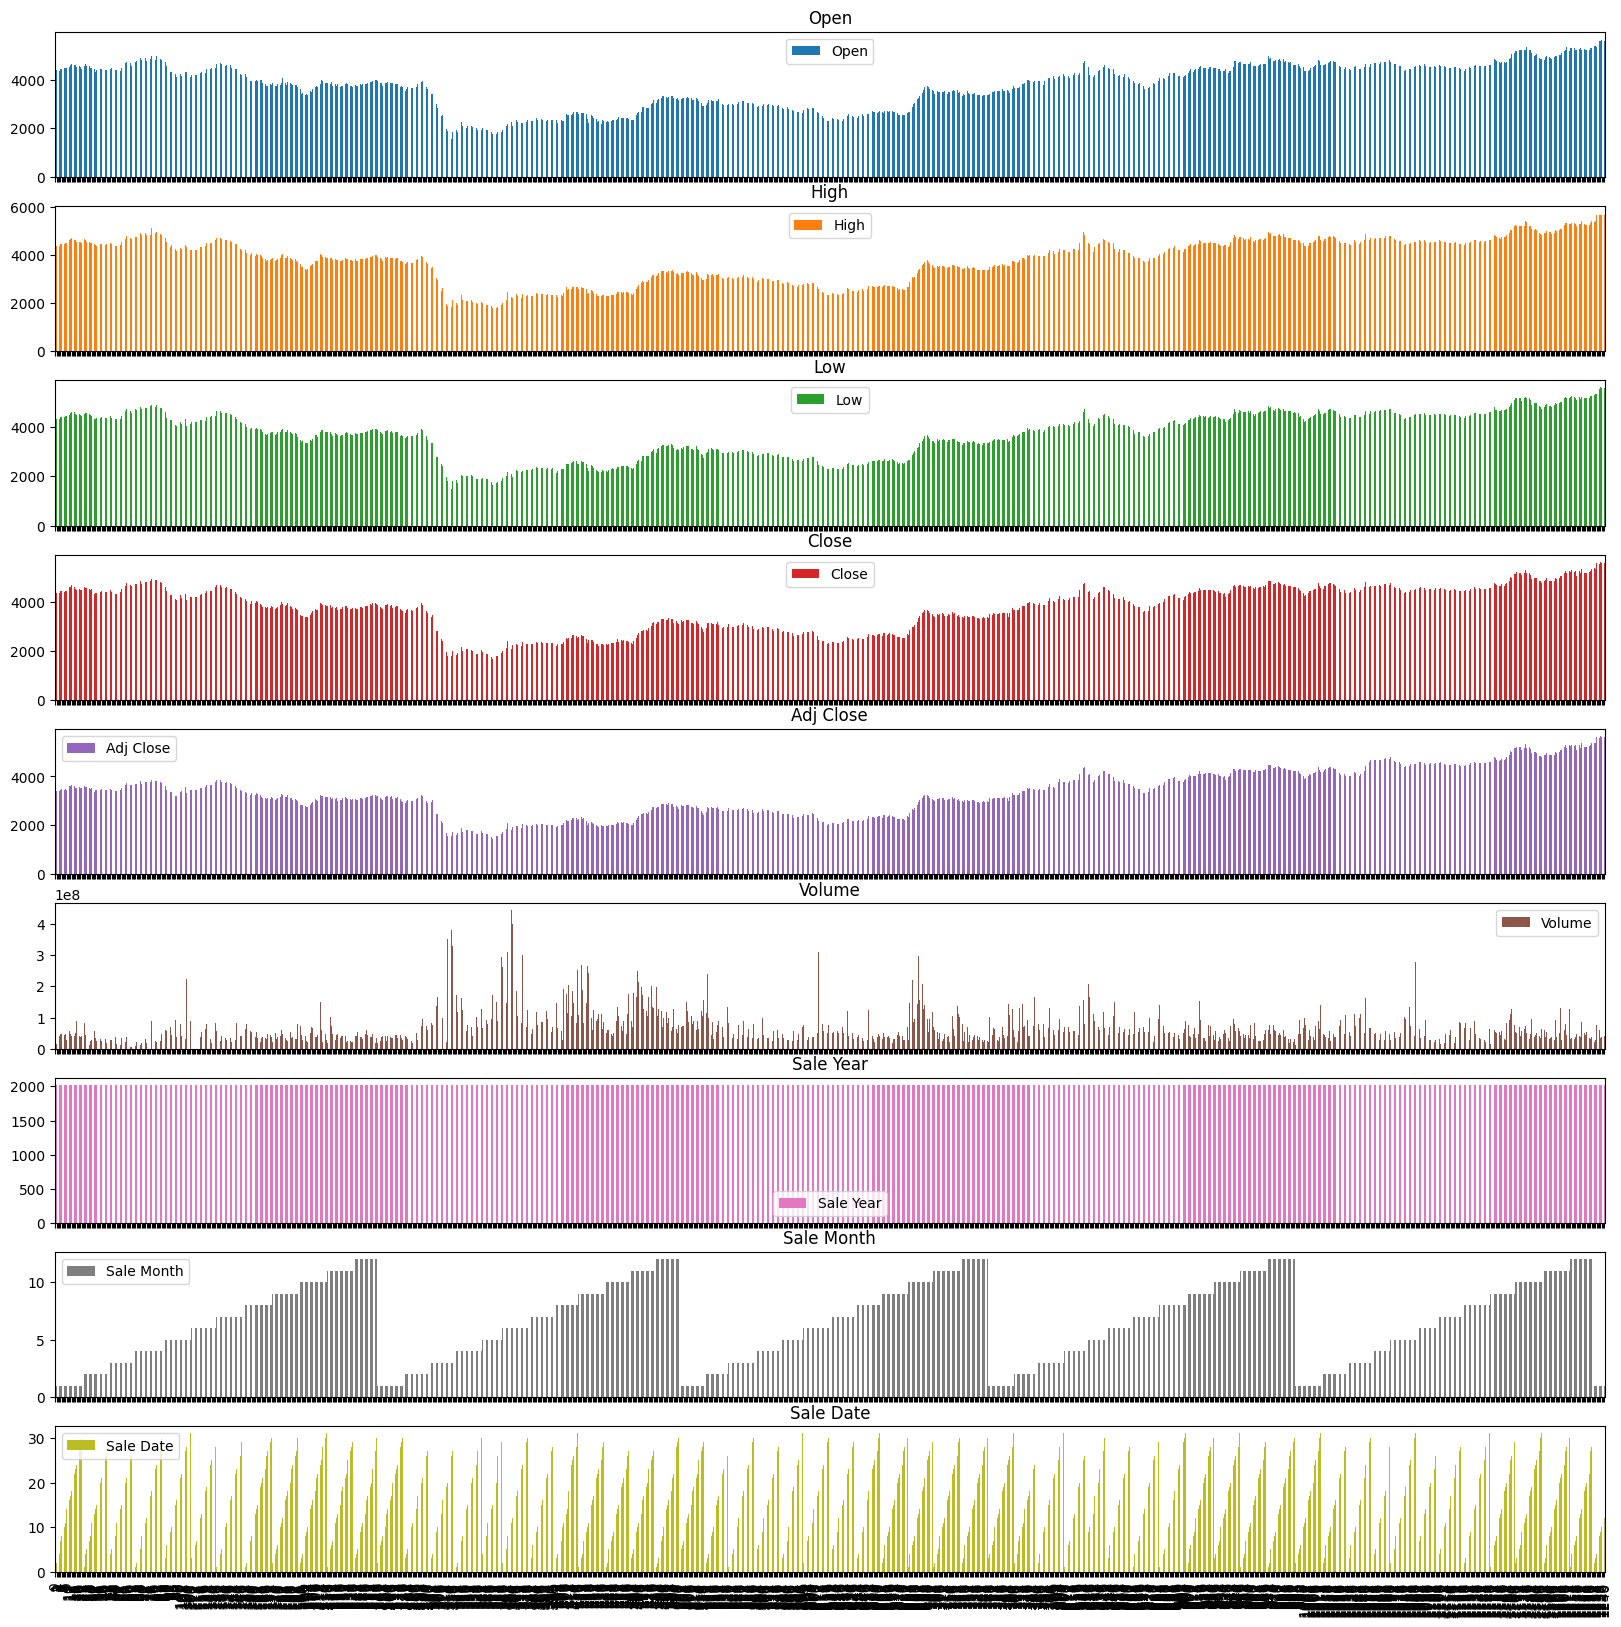

In [90]:
data.plot.bar(figsize=(20, 20), subplots=True);
fig.savefig("Documents/Git/ML-Crate/Stock Prediction Bank Negara/Images/barplotofeach.png")

## Preprocessing of the data

In [23]:
X = data.drop("Close", axis=1)
y = data["Close"]

In [24]:
np.shape(X)

(1241, 8)

In [25]:
np.shape(y)

(1241,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train.head()

,Open,High,Low,Adj Close,Volume,Sale Year,Sale Month,Sale Date
328,2000.0,2035.0,1950.0,1736.832520,41042600,2020,4,13
370,2250.0,2285.0,2215.0,1958.833740,104127000,2020,6,18
301,3425.0,3475.0,3350.0,2960.015137,83411600,2020,3,3
1133,4462.5,4550.0,4462.5,4537.500000,67682000,2023,8,9
914,4425.0,4500.0,4400.0,4116.426270,65135200,2022,9,13


In [28]:
X_test.head()

,Open,High,Low,Adj Close,Volume,Sale Year,Sale Month,Sale Date
1234,5350.0,5675.0,5325.0,5600.000000,77162400,2024,1,4
35,4487.5,4512.5,4412.5,3466.192871,17644000,2019,2,19
470,2875.0,2925.0,2825.0,2470.306885,173760800,2020,11,16
982,4700.0,4900.0,4675.0,4494.816406,106781400,2022,12,16
1162,4725.0,4837.5,4725.0,4787.500000,82221800,2023,9,20


In [29]:
y_train.head()

328     1995.0
370     2250.0
301     3400.0
1133    4537.5
914     4487.5
Name: Close, dtype: float64

In [30]:
#scaler = StandardScaler()

In [31]:
#scaled_X = scaler.fit_transform(X_train)

In [32]:
#scaled_X[0]

In [33]:
def score(y_true, y_pred):
    value = {"Mean Absolute Error ":mean_absolute_error(y_true, y_pred),
             "Mean Squared Error ":mean_squared_error(y_true, y_pred),
             "R2 Score":r2_score(y_true, y_pred)}
    return value

## Model and prediction

In [34]:
# Random Forest
clf_forest = RandomForestRegressor()
clf_forest.fit(X_train, y_train)
clf_pred_forest = clf_forest.predict(X_test)

In [35]:
score(y_test, clf_pred_forest)

{'Mean Absolute Error ': 19.477309236947786,
 'Mean Squared Error ': 866.6595281124493,
 'R2 Score': 0.9990326037476066}

In [36]:
# Decision Tree Regression
clf_log = DecisionTreeRegressor()
clf_log.fit(X_train, y_train)
clf_pred_log = clf_log.predict(X_test)
score(y_test, clf_pred_log)

{'Mean Absolute Error ': 22.86144578313253,
 'Mean Squared Error ': 1374.3222891566265,
 'R2 Score': 0.998465932480998}

In [37]:
# SVR
clf_svm = SVR()
clf_svm.fit(X_train, y_train)
clf_svm_pred = clf_svm.predict(X_test)
score(y_test, clf_svm_pred)

{'Mean Absolute Error ': 788.2252954757405,
 'Mean Squared Error ': 882792.8161091985,
 'R2 Score': 0.014595196565949653}

In [38]:
# Lasso
clf_lasso = Lasso()
clf_lasso.fit(X_train, y_train)
clf_lasso_pred = clf_lasso.predict(X_test)
score(y_test, clf_lasso_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.618e+05, tolerance: 8.132e+04
  model = cd_fast.enet_coordinate_descent(


{'Mean Absolute Error ': 22.73416446083203,
 'Mean Squared Error ': 793.2579945089769,
 'R2 Score': 0.9991145371553919}

In [39]:
# Ridge
clf_ridge = Ridge()
clf_ridge.fit(X_train, y_train)
clf_ridge_pred = clf_ridge.predict(X_test)
score(y_test, clf_ridge_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.44736e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'Mean Absolute Error ': 20.81480677177901,
 'Mean Squared Error ': 701.3868798400986,
 'R2 Score': 0.999217086967805}

In [40]:
# XGB
clf_xgb = XGBRegressor()
clf_xgb.fit(X_train, y_train)
clf_xgb_pred = clf_xgb.predict(X_test)
score(y_test, clf_xgb_pred)

{'Mean Absolute Error ': 24.922927059801708,
 'Mean Squared Error ': 1154.1110289797007,
 'R2 Score': 0.9987117401377764}